

**Análisis de la performance de los atletas olímpicos a lo largo de la historia.**

El propósito de este estudio es analizar la obtención de medallas de los atletas olímpicos a  través de la historia para encontrar relaciones entre las performances y otras variables como edad, sexo, NOC al que pertenecen, año de competencia y predecir si un atelta de élite obtendrá una medalla olímpica y caul sería.

Según Wikipedia, se otorga una medalla Olímpica a los competidores exitosos en uno de los Juegos Olímpicos. Hay tres clases de medallas: oro, otorgada al ganador; plata, otorgada al subcampeón; y bronce, otorgado al tercer lugar. La concesión de premios se detalla en los protocolos Olímpicos.

Las medallas totales ganadas se utilizan para clasificar a las naciones competidoras en las tablas de medallas, estas pueden compilarse para una disciplina específica, para una Olimpiada en particular o para todo el tiempo. 
Estos totales siempre suman las obtenciones por eventos en lugar de las medallas reales. Una victoria en un evento por equipos equivale a un solo oro para tales clasificaciones, aunque cada miembro del equipo recibe una medalla física. 
 
Un concepto importante es el de Comité Olímpico Nacional (NOC, por sus siglas en inglés), según Wikipedia es la sede nacional de cada país encargada de fomentar y proteger al Movimiento Olímpico en sus respectivos países. Estos comités también promueven el desarrollo de los atletas y preparan a los entrenadores y oficiales en un nivel nacional.  

La estrategia del trabajo será segmentar el Dataset por distintos criterios para encontrar relaciones fundamentadas. Utilizaré las librerías de Numpy,  Pandas, Matplotlib y Seaborn para trabajar y visualizar las hipótesis.
Se analizarán las medallas por atletas para analizar la posibilidad que un atleta obtenga una medalla, es decir difiriendo del criterio olímpico dado que no se busca predecir los futuros medallero.  Usaré el concepto de NOC que concentra a los atletas de distintos "teams" para totalizar las medallas por país. 

Se espera encontrar respuesta a las siguientes preguntas:

¿Históricamente los hombres han obtenido mayor cantidad de medallas que las 
mujeres?

¿Qué Comités Olímpicos Nacionales tienen las mejores performances en relación a la cantidad de atletas que participaron históricamente?

¿Existe alguna relación entre la cantidad de medallas obtenidas por los atletas y la edad?

¿El peso y la altura de los atletas puede ser determinante para predecir una performance exitosa? 

¿Algunos "games" (deportes) han aumentado o disminuido la cantidad de medallas?

¿Puede haber evolucionado (positivamente o negativamente) el interés en ciertas disciplinas? 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)

%matplotlib inline

In [ ]:
from google.colab import drive
import os 
drive.mount ('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


In [ ]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [ ]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


Vemos la información del dataset para encontrar valores nulos

In [ ]:
print(df_atletas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


Limpieza de datos. Calculamos la media para reemplazar los valores en 0 (cero) de las columnas "Age", "Height" y "Weight". En la columna "Medal" se reemplazan los valores NA con "sin medalla"

In [ ]:
x = df_atletas["Age"].mean()

df_atletas["Age"].fillna(x, inplace = True)

In [ ]:
x = df_atletas["Height"].mean()

df_atletas["Height"].fillna(x, inplace = True)

In [ ]:
x = df_atletas["Weight"].mean()

df_atletas["Weight"].fillna(x, inplace = True)

In [ ]:
x = df_atletas["Medal"]

df_atletas["Medal"].fillna('sin medalla', inplace = True)

In [ ]:
df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

**Corroboramos el reemplazo**


In [ ]:
print(df_atletas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [ ]:
x = df_atletas["Medal"]

df_atletas["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
4         sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 271116, dtype: object

Corroboramos el cambio en el Dataframe

In [ ]:
df_atletas

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.00000,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.00000,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


**Hipótesis 1: Históricamente los hombres han tenido mejor performance que las mujeres en cuanto a cantidad de medallas.** 

1) Se crea un dataframe que muestra la cantidad de medallas por sexo y color de medalla

In [ ]:
df_hm=df_atletas[['Sport','Medal','Sex']].groupby(by=['Sex','Medal']).count().reset_index() 
df_hm

,Sex,Medal,Sport
0,F,Bronze,3771
1,F,Gold,3747
2,F,Silver,3735
3,F,sin medalla,63269
4,M,Bronze,9524
5,M,Gold,9625
6,M,Silver,9381
7,M,sin medalla,168064


2) Se crean dos gráficos, uno de barras y otro de barras apiladas para visualizar las magnitudes.

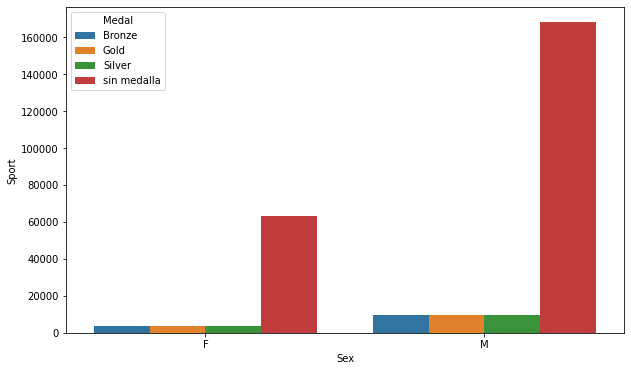

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y='Sport',x='Sex',hue='Medal',data=df_hm);

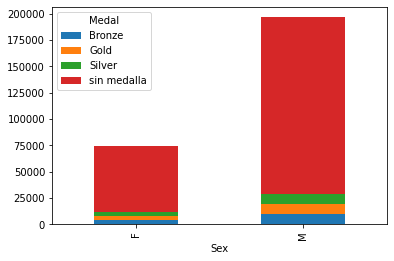

In [ ]:
agr = df_atletas.groupby(['Sex', 'Medal']).size().reset_index().pivot(columns='Medal', index='Sex', values=0)
agr.plot(kind='bar', stacked=True)

3) Se crea una tabla de frecuencias por color de medalla, que complementa los gráficos anteriores.

In [ ]:
pd.value_counts(df_atletas['Medal'])

sin medalla    231333
Gold            13372
Bronze          13295
Silver          13116
Name: Medal, dtype: int64

4) Se crea un gráfico de barras que muestra el porcentaje de medallas obtenidas por todos los atletas, según el color. Se observa que la mayoría de los atletas no obtienen medallas durante una Olimpiada.

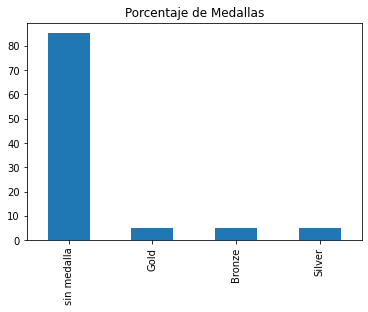

In [ ]:
plot = (100 * df_atletas['Medal'].value_counts() / len(df_atletas['Medal'])).plot(
kind='bar', title='Porcentaje de Medallas')

5) Se crea un gráfico de pastel que muestra los porcentajes de obtención de medallas, por color. 

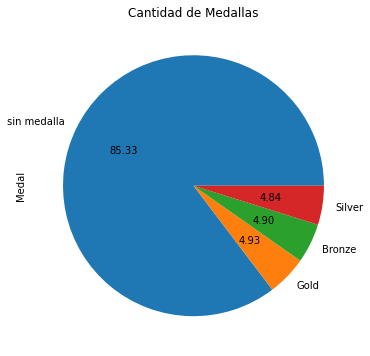

In [ ]:
plot = df_atletas['Medal'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Cantidad de Medallas')

6) Se muestra la tabla de frecuencias relativas que complementa los gráficos anteriores.

In [ ]:
100 * df_atletas['Medal'].value_counts() / len(df_atletas['Medal'])

sin medalla    85.326207
Gold            4.932206
Bronze          4.903805
Silver          4.837782
Name: Medal, dtype: float64

7) Se crea una tabla de doble entrada Sexo/Medallas con el fin de buscar validar la hipótesis. En ella se verifica que históricamente los hombres han obtenido, en valores absolutos, mayor cantidad total de medallas (196.594 contra 74.522)

In [ ]:
pd.crosstab(index=df_atletas['Medal'],
            columns=df_atletas['Sex'], margins=True)

Sex,F,M,All
Medal,,,
Bronze,3771,9524,13295
Gold,3747,9625,13372
Silver,3735,9381,13116
sin medalla,63269,168064,231333
All,74522,196594,271116


8) Se crea una tabla de doble entrada en porcentajes relativos. Se muestra que las mujeres han obtenido históricamente el 27.48% de las medallas en juego contra 85.32% de las obtenidas por los hombres. 

In [ ]:
pd.crosstab(index=df_atletas['Medal'], columns=df_atletas['Sex'],
            margins=True).apply(lambda r: r/len(df_atletas) *100,
                                axis=1)

Sex,F,M,All
Medal,,,
Bronze,1.390918,3.512887,4.903805
Gold,1.382065,3.550141,4.932206
Silver,1.377639,3.460143,4.837782
sin medalla,23.336505,61.989702,85.326207
All,27.487127,72.512873,100.000000


9) Se crea la tabla de doble entrada en porcentajes relativos según color de medalla. Se verifica, por ejemplo, que para las medallas doradas, el 28.02% fueron obtenidas por las mujeres y el 71.98% por los atletas varones. 

In [ ]:
pd.crosstab(index=df_atletas['Medal'], columns=df_atletas['Sex']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Sex,F,M
Medal,,
Bronze,28.364047,71.635953
Gold,28.021238,71.978762
Silver,28.476670,71.523330
sin medalla,27.349751,72.650249


10) Se crea una tabla de doble entrada que muestra el porcentaje relativo de acuerdo a la cantidad de participaciones de hombres y mujeres. De este análisis se verifica que las mujeres y los hombres tienen históricamente idénticas performances, obteniendo, las atletas mujeres,  algunos puntos porcentuales mayores que los hombres (0.90% para medallas de bronce, 0.88% para medallas de plata y 0.91% para medallas de oro; y -0.59% de partipantes femeninas sin medallas)

In [29]:
pd.crosstab(index=df_atletas['Medal'], columns=df_atletas['Sex']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Sex,F,M
Medal,,
Bronze,5.060251,4.844502
Gold,5.028045,4.895877
Silver,5.011943,4.771763
sin medalla,84.899761,85.487858


11) En el siguiente gráfico se visualiza la paridad.

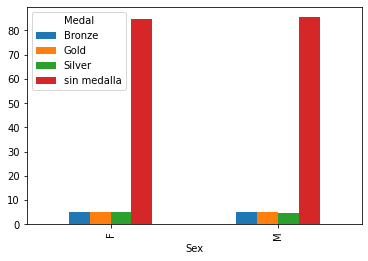

In [30]:
plot = pd.crosstab(index=df_atletas['Sex'],
            columns=df_atletas['Medal']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

**Conclusión: Se rechaza la hipótesis que plantea una mejor performance histórica de los hombres sobre las mujeres, siendo el desempeño muy similar, incluso con algunos puntos superiores para las atletas mujeres.** 

**Queda, después de este análisis, estudiar los motivos por los cuales la participación femenina es históricamente muy baja respecto de la competencia de atletas varones. Sería interesante estudiar las edades de los participantes para verificar si hay una mayor amplitud etaria entre los hombres respecto de las mujeres y buscar las causas (la incipiente maternidad, los hijos, etc.) a fin de proponer recursos para fomentar la participación femenina y descartar factores discriminatorios. También verificar la participación femenina a través del tiempo para constatar la tendencia de este comportamiento **

**Hipótesis 2: Le edad, el peso y la altura del atleta dertermina su performance olímpica. Se busca predecir si un atleta de elite será medallista olímpico evaluando estas variables.** 

1) Graficamos un diagrama de dispersión en dos dimensiones para verificar la relación entre peso y altura segmentado por color de medalla. 

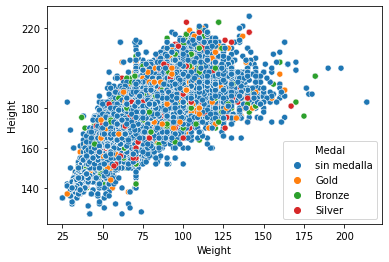

In [ ]:
sns.scatterplot(data=df_atletas, x="Weight", y="Height", hue="Medal")

Parece haber una relación directa entre peso, altura y cantidad de medallas obtenidas, pero debe profundizarse el análsis para aceptar o rechazar la hipótesis.  